# Focus on the text data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
d = pd.read_csv('./Flipkart/flipkart_com-ecommerce_sample_1050.csv')

### Extracting the category of products

In [3]:
d['main_cat'] = d['product_category_tree'].apply(lambda x: x.split('>>')[0][2:-1])

In [4]:
dt = d.loc[:,['product_name','description','main_cat']]
dt.head()

product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description         main_cat  
0  Key Features of Elegance Polyester Multicolor ...  Home Furnishing  
1  Specifications of Sathiyas Cotton Bath Towel (...        Baby Care  
2  Key Features of Eurospa Cotton Terry Face Towe...        Baby Care  
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  Home Furnishing  
4  Key Features of Jaipur Print Cotton Floral Kin...  Home Furnishing

# 1. Cleaning the text

In [5]:
destest = dt.loc[0,'description']
destest

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

## 1.1 Tokenization

In [6]:
# split on whitespace and punctuation
from nltk.tokenize import wordpunct_tokenize
tokens = wordpunct_tokenize(destest)
print(tokens[:100])

['Key', 'Features', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', ',', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', '(', '213', 'cm', 'in', 'Height', ',', 'Pack', 'of', '2', ')', 'Price', ':', 'Rs', '.', '899', 'This', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors', '.', 'This', 'curtain', 'is', 'made', 'from', '100', '%', 'high', 'quality', 'polyester', 'fabric', '.', 'It', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'Metal', 'Ring', '.', 'It', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving', '.', 'This', 'curtain', 'is', 'ant', '-', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance', '.', 'Give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs']


### 1.2 Removing the upper cases, punctuation, numbers, etc.

In [7]:
# convert to lower case
tokens = [w.lower() for w in tokens]
print(tokens[:100])

['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', ',', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '(', '213', 'cm', 'in', 'height', ',', 'pack', 'of', '2', ')', 'price', ':', 'rs', '.', '899', 'this', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors', '.', 'this', 'curtain', 'is', 'made', 'from', '100', '%', 'high', 'quality', 'polyester', 'fabric', '.', 'it', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'metal', 'ring', '.', 'it', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving', '.', 'this', 'curtain', 'is', 'ant', '-', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance', '.', 'give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs']


In [8]:
# remove punctuation
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
print(stripped[:100])

['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', '', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '', '213', 'cm', 'in', 'height', '', 'pack', 'of', '2', '', 'price', '', 'rs', '', '899', 'this', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors', '', 'this', 'curtain', 'is', 'made', 'from', '100', '', 'high', 'quality', 'polyester', 'fabric', '', 'it', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'metal', 'ring', '', 'it', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving', '', 'this', 'curtain', 'is', 'ant', '', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance', '', 'give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs']


In [9]:
# remove tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
print(words[:100])

['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'cm', 'in', 'height', 'pack', 'of', 'price', 'rs', 'this', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors', 'this', 'curtain', 'is', 'made', 'from', 'high', 'quality', 'polyester', 'fabric', 'it', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'metal', 'ring', 'it', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving', 'this', 'curtain', 'is', 'ant', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance', 'give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', 'the', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', 'these', 'contemporary', 'eyelet', 'and', 'valance', 'curtains', 'slide', 'smoothly', 'so']


### 1.3 Removing "stop words"

In [10]:
# filter out stop words ('of', 'the', 'if', etc.)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'cm', 'height', 'pack', 'price', 'rs', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', 'high', 'quality', 'polyester', 'fabric', 'features', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'makes', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'designs', 'surreal', 'attention', 'sure', 'steal', 'hearts', 'contemporary', 'eyelet', 'valance', 'curtains', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'rays', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moments', 'joyous', 'beauty', 'given', 'soothing', 'prints', 'bring', 'home', 'elegant', 'curtain', '

### 1.4 Lemmatization

In [11]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

words = [wnl.lemmatize(w) for w in words]
print(words[:100])

['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'cm', 'height', 'pack', 'price', 'r', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester', 'fabric', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'design', 'surreal', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moment', 'joyous', 'beauty', 'given', 'soothing', 'print', 'bring', 'home', 'elegant', 'curtain', 'softly', 'f

### 1.5 Apply to all the descriptions

In [12]:
def clean_text(text):
    words = wordpunct_tokenize(text)
    words = [w.lower() for w in words]
    words = [w.translate(table) for w in words]
    words = [w for w in words if w.isalpha()]
    words = [w for w in words if not w in stop_words]
    words = [wnl.lemmatize(w) for w in words]
    return (' '.join(words))

In [13]:
dt['description_clean'] = dt.loc[:,'description'].apply(clean_text)

In [4]:
#dt.to_csv('clean_text.csv', index=0)
dt = pd.read_csv('clean_text.csv')

# 2. Count Vectorizer and Tf-idf

## 2.1 General word count with CountVectorizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# ignore words present in less than 5 descriptions
vectorizer = CountVectorizer(min_df=5)
cv = vectorizer.fit_transform(dt.description_clean)
dtm = pd.DataFrame(cv.toarray(), columns= vectorizer.get_feature_names())
dtm.head()

absorbent  abstract  ac  accessory  actual  adapter  add  addition  \
0          0         4   0          0       0        0    0         0   
1          0         0   0          0       0        0    0         0   
2          0         0   0          0       0        0    0         0   
3          0         0   0          0       0        0    0         0   
4          0         0   0          0       0        0    0         0   

   additional  adhesive  ...  wooden  work  working  world  would  wrap  year  \
0           0         0  ...       0     0        0      1      0     0     0   
1           0         0  ...       0     0        0      0      0     0     0   
2           0         0  ...       0     0        0      0      0     0     1   
3           0         0  ...       0     0        0      0      0     0     0   
4           0         0  ...       0     0        0      0      0     0     0   

   yellow  yes  yet  
0       0    0    0  
1       2    1    0  
2       0    0    0  
3       0    1    0  
4       0    1    0  

[5 rows x 940 columns]

### A) Most frequent words in all descriptions

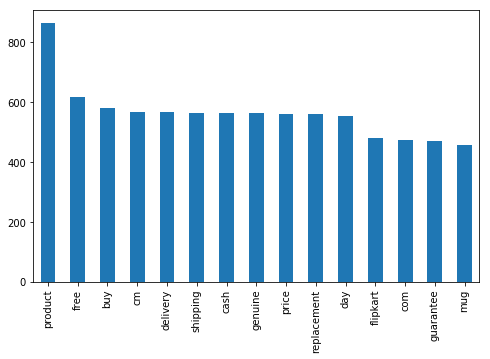

In [7]:
dtm.sum(axis=0).sort_values(ascending=False)[:15].plot.bar(figsize=(8,5))
plt.show()

#### Most of these words do not provide information on the nature of the product, we will filter them out.

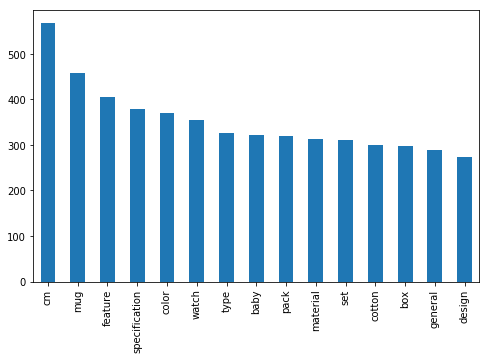

In [8]:
# ignore words present in more than 35% of the descriptions
vectorizer = CountVectorizer(max_df=0.35, min_df=5)
cv = vectorizer.fit_transform(dt.description_clean)
dtm = pd.DataFrame(cv.toarray(), columns= vectorizer.get_feature_names())
dtm.sum(axis=0).sort_values(ascending=False)[:15].plot.bar(figsize=(8,5))
plt.show()

In [9]:
dtm.shape

(1050, 926)

14 words have been removed

### B) Most frequent words per category

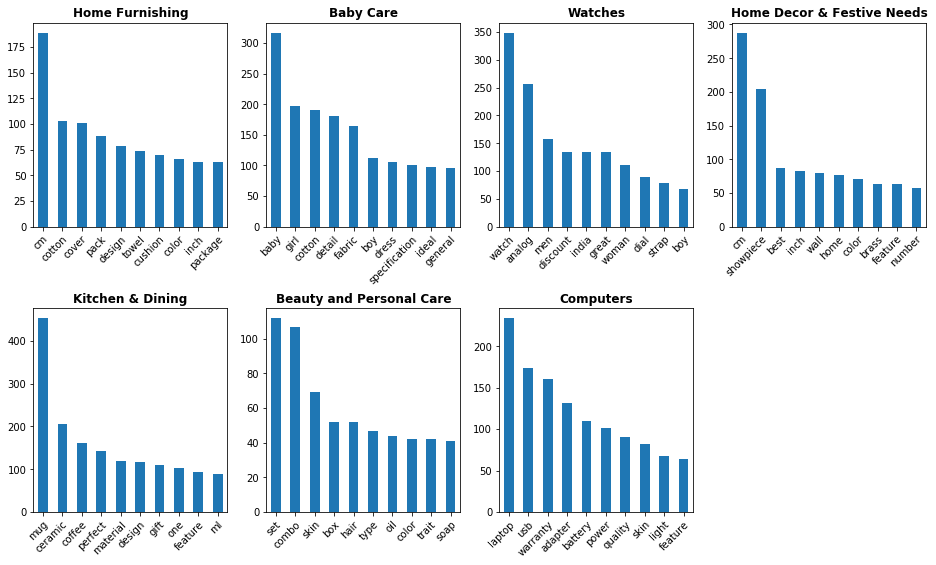

In [10]:
figure = plt.figure(figsize=(16,9))
i=0
for cat in dt.loc[:,'main_cat'].unique():
    i += 1
    ax = figure.add_subplot(2,4,i)
    most_freq_words = dtm[dt.loc[:,'main_cat']==cat].sum(axis=0).sort_values(ascending=False)[:10]
    most_freq_words.plot.bar(ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")    
    ax.set_title(cat, weight='bold')
figure.subplots_adjust(hspace=.4)
plt.show()

### C) Supervised classification of features

In [11]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
r_params = {'n_estimators': [100,200,300],
            'oob_score' : [True, False]}

In [12]:
X = dtm.copy()
Y = dt.loc[:,'main_cat']

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8, random_state=0)

In [15]:
# we perform a GridSearch to select the best hyperparameters
gscv = GridSearchCV(RFC, r_params, cv = 5, scoring='accuracy')
gscv.fit(xtrain, ytrain)
print(gscv.best_params_)
print('Best Accuracy :',round(gscv.best_score_,3))

{'n_estimators': 200, 'oob_score': True}
Best Accuracy : 0.935


In [16]:
# Accuracy on the test set
RFC = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=0)
RFC.fit(xtrain,ytrain)
ypred = RFC.predict(xtest)
RFC.score(xtest,ytest)

0.9238095238095239

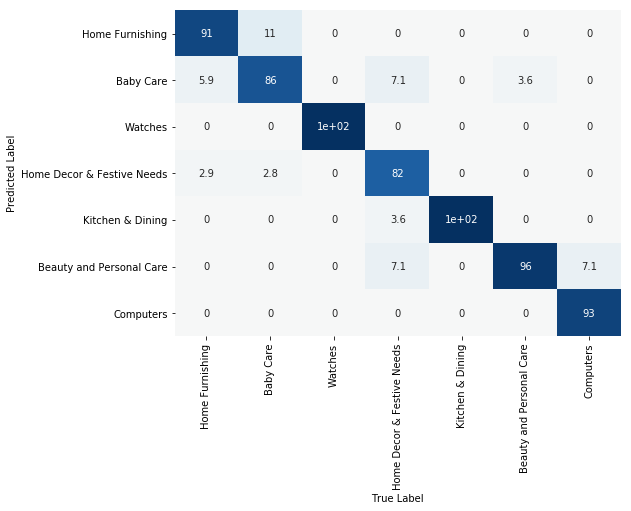

In [17]:
from sklearn.metrics import confusion_matrix
listcat = Y.unique().tolist()
cm=confusion_matrix(ytest, ypred, labels=listcat, normalize='pred')

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm*100, annot=True, cmap='RdBu', center=0, cbar=False)
ax.set_xticklabels(listcat, rotation=90)
ax.set_yticklabels(listcat, rotation=0)
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')

plt.show()

## 2.2 Relative frequencies : tf-idf

tf-idf = term frequency * inverse document frequency

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.35, min_df=5)

In [19]:
tf = tfidf.fit_transform(dt.description_clean)

tf_m = pd.DataFrame(tf.toarray(), columns= tfidf.get_feature_names())
tf_m.head()

absorbent  abstract   ac  accessory  actual  adapter  add  addition  \
0        0.0  0.187358  0.0        0.0     0.0      0.0  0.0       0.0   
1        0.0  0.000000  0.0        0.0     0.0      0.0  0.0       0.0   
2        0.0  0.000000  0.0        0.0     0.0      0.0  0.0       0.0   
3        0.0  0.000000  0.0        0.0     0.0      0.0  0.0       0.0   
4        0.0  0.000000  0.0        0.0     0.0      0.0  0.0       0.0   

   additional  adhesive  ...  wooden  work  working     world  would  wrap  \
0         0.0       0.0  ...     0.0   0.0      0.0  0.061755    0.0   0.0   
1         0.0       0.0  ...     0.0   0.0      0.0  0.000000    0.0   0.0   
2         0.0       0.0  ...     0.0   0.0      0.0  0.000000    0.0   0.0   
3         0.0       0.0  ...     0.0   0.0      0.0  0.000000    0.0   0.0   
4         0.0       0.0  ...     0.0   0.0      0.0  0.000000    0.0   0.0   

       year    yellow       yes  yet  
0  0.000000  0.000000  0.000000  0.0  
1  0.000000  0.195986  0.076799  0.0  
2  0.049494  0.000000  0.000000  0.0  
3  0.000000  0.000000  0.043672  0.0  
4  0.000000  0.000000  0.036694  0.0  

[5 rows x 926 columns]

In [20]:
# Saving the dataset
tf_m.to_csv('features_txt.csv', index=False)

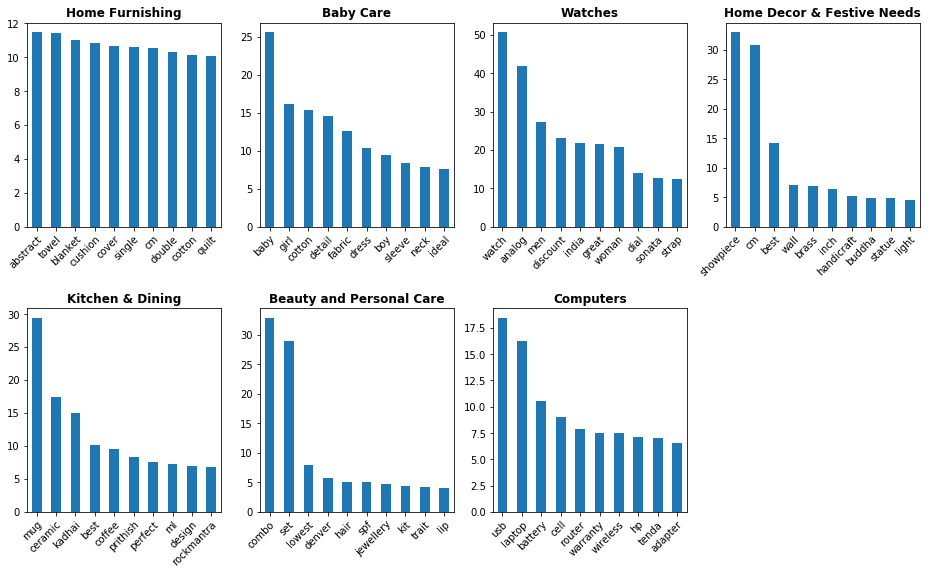

In [21]:
figure = plt.figure(figsize=(16,9))
i=0
for cat in dt.loc[:,'main_cat'].unique():
    i += 1
    ax = figure.add_subplot(2,4,i)
    best_tfidf = tf_m[dt.loc[:,'main_cat']==cat].sum(axis=0).sort_values(ascending=False)[:10]
    best_tfidf.plot.bar(ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")    
    ax.set_title(cat, weight='bold')
figure.subplots_adjust(hspace=.4)
plt.show()    

### Supervised classification of features

In [22]:
X = tf_m.copy()

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8, random_state=0)

In [24]:
gscv = GridSearchCV(RFC, r_params, cv = 5, scoring='accuracy')
gscv.fit(xtrain, ytrain)
print(gscv.best_params_)
print('Best Accuracy :',round(gscv.best_score_,3))

{'n_estimators': 200, 'oob_score': True}
Best Accuracy : 0.932


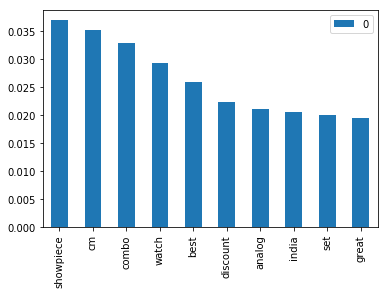

In [25]:
# Plot the Feature Importances
RFC = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=0)
RFC.fit(xtrain,ytrain)
pd.DataFrame(RFC.feature_importances_, index=tf_m.columns).sort_values(0,ascending=False)[0:10].plot.bar()

In [26]:
# Accuracy on the test set 
ypred = RFC.predict(xtest)
RFC.score(xtest,ytest)

0.919047619047619

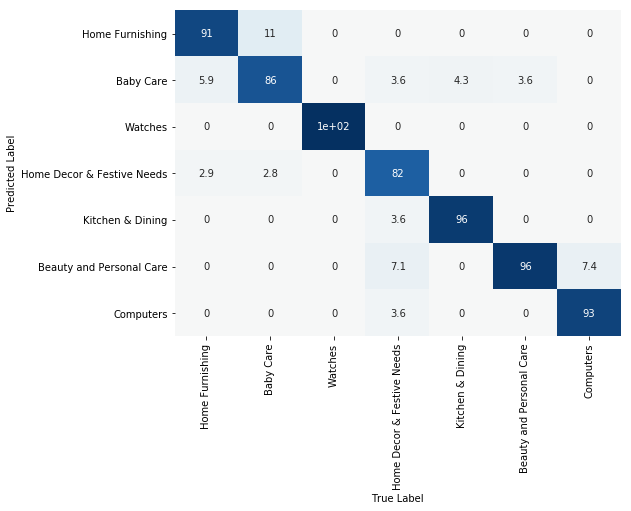

In [27]:
from sklearn.metrics import confusion_matrix
listcat = Y.unique().tolist()
cm=confusion_matrix(ytest, ypred, labels=listcat, normalize='pred')

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm*100, annot=True, cmap='RdBu', center=0, cbar=False)
ax.set_xticklabels(listcat, rotation=90)
ax.set_yticklabels(listcat, rotation=0)
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')

plt.show()

# 3. Unsupervised approaches : LDA and NMF

## 3.1 LDA (Latent Dirichlet Allocation)

In [28]:
from sklearn.decomposition import LatentDirichletAllocation

In [29]:
lda = LatentDirichletAllocation(n_components=7, learning_method='online', 
                                learning_offset=50.,random_state=0)
lda.fit(cv)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [30]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

### A) Displaying the created topics with 10 top words

In [31]:
no_top_words = 10
tf_feature_names = vectorizer.get_feature_names()
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
usb mug perfect bring coffee quality art fan make design
Topic 1:
laptop warranty shape print pad mouse quality inch multicolor adapter
Topic 2:
watch analog sticker wall india men great discount woman dial
Topic 3:
skin set combo hair type trait pack oil ml soap
Topic 4:
towel cotton single double bedsheet sheet blanket bath bottle multicolor
Topic 5:
mug cm showpiece ceramic gift home best coffee material one
Topic 6:
cm baby color pack feature box specification general number package


#### Interprétation :
- The topic 1 could correspond to 'Computers'
- The topic 2 to 'Watches'
- The topic 3 to 'Beauty & Personal Care'
- The topic 5 to 'Kitchen & Dining'  
The other categories are not clearly identifiable in the created topics.

### B) Distribution of the products in the created topics

In [32]:
list_topics = ['Topic {}'.format(n) for n in range(7)]

In [35]:
lda_transform = pd.DataFrame(lda.transform(cv), columns=list_topics)
lda_best_topic = lda_transform.idxmax(axis=1)

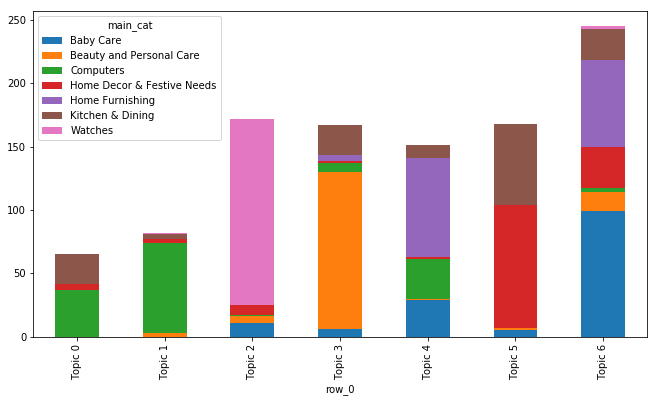

In [36]:
# Part de chaque catégorie dans les topics
pd.crosstab(lda_best_topic, dt['main_cat']).plot.bar(figsize=(11,6), stacked=True)

#### Conclusion : Only the topics 1, 2 and 3 clearly identify a single product category

## 3.2 NMF (Negative Matrix Factorization)

In [37]:
from sklearn.decomposition import NMF

In [38]:
nmf = NMF(n_components=7, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd' )
nmf.fit(tf)

NMF(alpha=0.1, beta_loss='frobenius', init='nndsvd', l1_ratio=0.5, max_iter=200,
    n_components=7, random_state=1, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

### A)  Displaying the created topics with 10 top words

In [39]:
no_top_words = 10
tfidf_feature_names = tfidf.get_feature_names()
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
watch analog men discount india great woman dial sonata strap
Topic 1:
baby girl detail fabric cotton dress boy sleeve neck pack
Topic 2:
combo set denver playboy deodorant adidas wild ice gift stone
Topic 3:
showpiece cm best handicraft brass statue buddha ganesha exotic gift
Topic 4:
mug ceramic coffee rockmantra perfect gift prithish one loved design
Topic 5:
laptop battery cell hp pavilion lapguard skin warranty adapter shape
Topic 6:
towel bath cotton set soft hand face linen absorbent yellow


#### Interprétation :
- The topic 1 could correspond to 'Baby Care'
- The topic 2 to 'Beauty & Personal Care'
- The topic 4 to 'Kitchen & Dining'
- The topic 5 to 'Computers'  
The other categories are not clearly identifiable in the created topics.

### B) Distribution of the products in the created topics

In [40]:
nmf_transform = pd.DataFrame(nmf.transform(tf), columns=list_topics)
nmf_best_topic = nmf_transform.idxmax(axis=1)

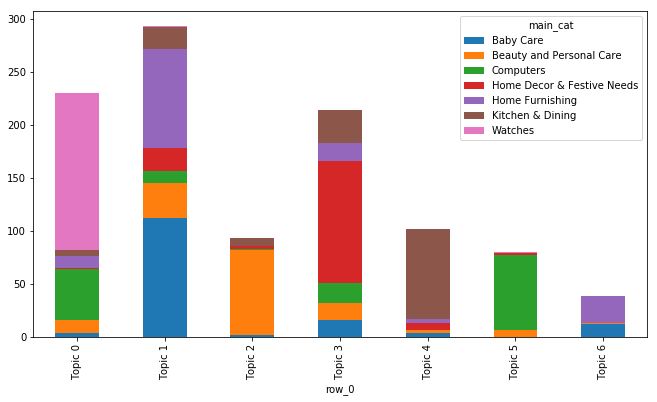

In [41]:
pd.crosstab(nmf_best_topic, dt['main_cat']).plot.bar(figsize=(11,6), stacked=True)

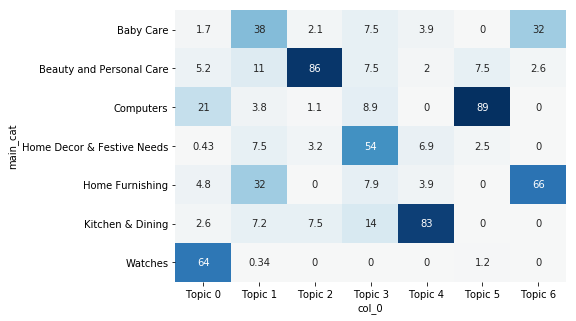

In [42]:
plt.figure(figsize=(7,5))
ct = pd.crosstab(dt['main_cat'], nmf_best_topic, normalize='columns')*100
sns.heatmap(ct.round(2), annot=True, cmap='RdBu', center=0, cbar=False)
plt.show()

#### Here only the topics 2, 4 and 5 clearly identify a single product category

# 4. Segmentation of the Text Features
#### We only use features from Tfidf Vectorizer

## 4.1 2D Projection

In [43]:
from sklearn.manifold import TSNE

In [44]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1500, random_state=42)
tsne_results = tsne.fit_transform(tf_m)
tsne_df = pd.concat([pd.DataFrame(tsne_results), dt['main_cat']], axis=1)

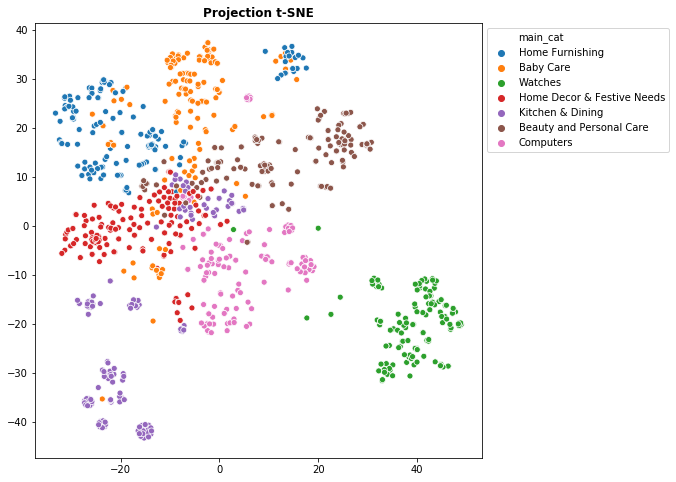

In [45]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x=0, y=1, hue='main_cat', data=tsne_df, sizes=2, ax=ax)
ax.set_title('Projection t-SNE', fontsize=12, weight='bold')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

### Interactive plot

In [46]:
import plotly.express as px
fig = px.scatter(tsne_df, x=0, y=1, color='main_cat', hover_name=dt['product_name'], 
                 labels={'main_cat':'Category'}, title='Projection t-SNE')
fig.show()

## 4.2 K-Means Clustering 

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [48]:
# Finding the best number of clusters
silhouettes = []

for n_cluster in range(5, 15):
    cls = KMeans(n_clusters=n_cluster, n_init=50, random_state=7)
    cls.fit(tf_m)
    silhouettes.append(silhouette_score(tf_m, cls.labels_))

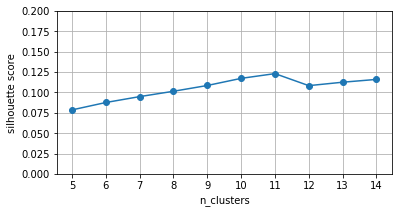

In [49]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(range(5, 15), silhouettes, marker='o')
ax.set_ylim(0, 0.2)
ax.set_xticks(range(5, 15))
ax.set_xlabel('n_clusters')
ax.set_ylabel('silhouette score')
ax.grid()
plt.show()

In [50]:
kmeans = KMeans(n_clusters=11, n_init=50, random_state=7)
kmeans.fit(tf_m)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

### Plotting the clusters on the t-SNE projection

In [51]:
tsnekm = np.column_stack((tsne_results, kmeans.labels_.astype(object)))
tsnekmdf = pd.DataFrame(tsnekm, columns = [0,1,'kmeans_label'])

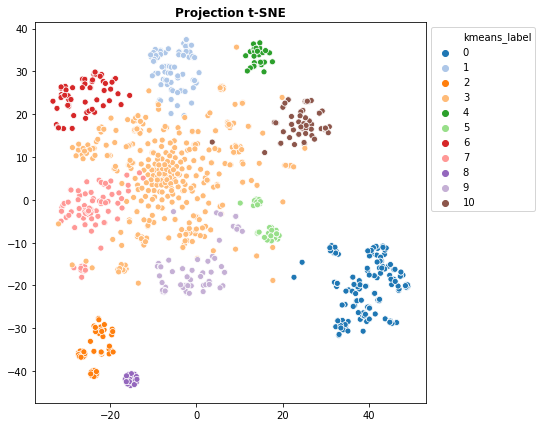

In [52]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=0, y=1, hue='kmeans_label', data=tsnekmdf, palette=sns.color_palette("tab20", 11), legend='full')
ax.set_title('Projection t-SNE', fontsize=12, weight='bold')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

In [53]:
fig = px.scatter(tsnekmdf, x=0, y=1, color='kmeans_label', hover_name=dt['product_name'])
fig.show()

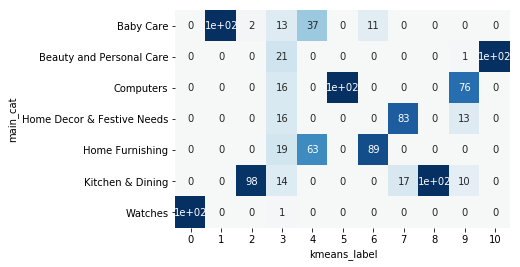

In [60]:
# Distribution of the products in each cluster
cross_tab = pd.crosstab(dt['main_cat'], tsnekmdf['kmeans_label'], normalize='columns')*100
sns.heatmap(cross_tab.round(), annot=True, cmap='RdBu', center=0, cbar=False)
plt.show()

# 5. Combination of text and image features

In [54]:
feat_img = pd.read_csv('features_img.csv')
feat_text = pd.read_csv('features_txt.csv')

In [146]:
print(feat_text.shape,feat_img.shape)

(1050, 926) (1050, 25088)


In [56]:
# We need to match the dimensions of the two sets of features, so that they have the same weight for the learning
from sklearn import decomposition
pca = decomposition.PCA(n_components=feat_text.shape[1])
feat_imgp = pd.DataFrame(pca.fit_transform(feat_img))

In [57]:
# Concatenation of features
features = pd.concat((feat_text,feat_imgp), axis=1)
features.shape

(1050, 1852)

## 5.1 Supervised Classification

In [58]:
X = features.copy()

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8, random_state=0)

In [60]:
# Selection of the best hyperparameters
r_params = {'n_estimators': [100,200,300],
            'max_features' : ['auto', 0.5]}
gscv = GridSearchCV(RFC, r_params, cv = 5, scoring='accuracy')
gscv.fit(xtrain, ytrain)
print(gscv.best_params_)
print('Best Accuracy :',round(gscv.best_score_,3))

KeyboardInterrupt: 

In [61]:
# Plot the feature importances
RFC = RandomForestClassifier(n_estimators=200, random_state=0)
RFC.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

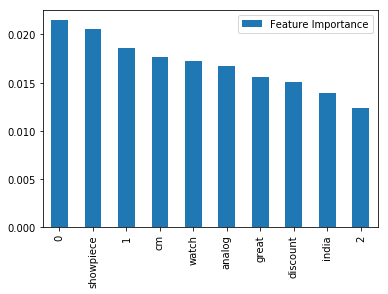

In [62]:
fi = pd.DataFrame(RFC.feature_importances_, index=features.columns, columns=['Feature Importance'])
fi.sort_values('Feature Importance',ascending=False)[0:10].plot.bar()
plt.show()

Upon the 10 most important features, there is 3 "image features" and 7 "text features"

## 5.2 t-SNE Projection

In [63]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_proj = tsne.fit_transform(features)
tsne_tag = pd.concat([pd.DataFrame(tsne_proj), dt['main_cat']], axis=1)

In [64]:
fig = px.scatter(tsne_tag, x=0, y=1, color='main_cat', hover_name=dt['product_name'], 
                 labels={'main_cat':'Category'}, title='Projection t-SNE')
fig.show()

In [165]:
tsne_tag.to_csv('featurestextimg.csv')

## 5.3 Segmentation avec K-Means

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [156]:
silhouettes = []

for n_cluster in range(6, 12):
    cls = KMeans(n_clusters=n_cluster, n_init=50, random_state=7)
    cls.fit(features)
    silhouettes.append(silhouette_score(features, cls.labels_))

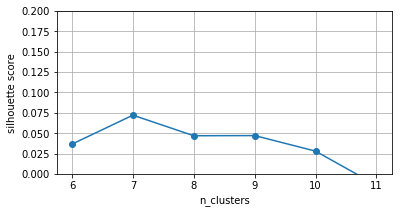

In [157]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(range(6, 12), silhouettes, marker='o')
ax.set_ylim(0, 0.2)
ax.set_xticks(range(6, 12))
ax.set_xlabel('n_clusters')
ax.set_ylabel('silhouette score')
ax.grid()
plt.show()

In [65]:
kmeans = KMeans(n_clusters=7, n_init=50, random_state=7)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [66]:
tsnekm = np.column_stack((tsne_proj, kmeans.labels_.astype(object)))
tsnekmdf = pd.DataFrame(tsnekm, columns = [0,1,'kmeans_label'])

In [67]:
fig = px.scatter(tsnekmdf, x=0, y=1, color='kmeans_label', hover_name=dt['product_name'], 
                 labels={'main_cat':'Category'}, title='Projection t-SNE')
fig.show()

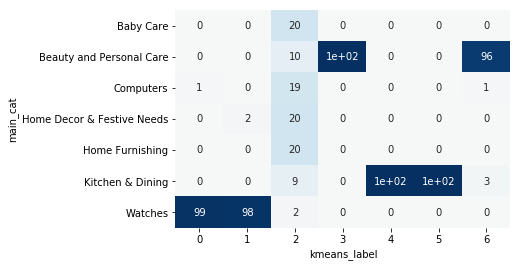

In [162]:
# Distribution of products in each cluster
cross_tab = pd.crosstab(dt['main_cat'], tsnekmdf['kmeans_label'], normalize='columns')*100
sns.heatmap(cross_tab.round(), annot=True, cmap='RdBu', center=0, cbar=False)
plt.show()

In [164]:
# Percentage of products in each cluster
(pd.Series(kmeans.labels_).value_counts()/10.50).sort_index().round(2)

0     6.67
1     6.19
2    72.76
3     0.29
4     4.29
5     2.95
6     6.86
dtype: float64

### Conclusion : Whether in supervised or unsupervised classification, the use of text data seems to be the most appropriate way to segment products.

### However, none of the unsupervised methods were able to correctly isolate the seven categories of products.